# What Makes A Social Media Video Go Viral?

## Introduction

I've always been curious about what makes a video on social media go viral, andwhat keeps a video from going viral. My 8 years of experience of making videos for social media has given me some insight, but I wanted to expand this and really truly be able to see the factors that contributed to virality vs prevented it. This project is just that.

The project relied on one piece of information from Instagram itself about its algorithm: The higher the watch time (total duration a viewer watches a piece of short form content) the higher the view count.

This project specifically analyzes 50 different pieces of short form content from Instagram called Reels. 12 different factors were used to predict higher rates of watch time, which in turn meant virality. The factors are the following:

- Strong hook
- CTA Comment
- CTA Save
- CTA Share
- CTA Follow
- Cuts in Videos
- Trending Sound
- Previous Content Viral
- High Quality
- Long Engaging Caption
- Relatable
- Punchline

Here they are explained in detail:

#### Strong hook
This refers to the first few seconds and the general theme of the video is something that provokes an emotional response from a viewer. This could be surprise/shock at something not seen before, joy from something heartwarming, or humor from something incredibly funny.
#### CTA Comment
This refers to a call to action given by the video creator to comment underneath the video, promoting engagement.
#### CTA Save
This refers to a call to action given by the video creator to hit "save" on the video, promoting engagement.
#### CTA Share
This refers to a call to action given by the video creator to hit "share" on the video, promoting engagement.
#### CTA Follow
This refers to a call to action to follow the video creator.
#### Cuts in Videos
This refers to how many times the perspective and scene of the video changes. This includes different camera angle, different locations, etc.
#### Trending Sound
This refers to a sound that is currently growing in how many other video creators are starting to use it in their videos. Instagram tends to promote these sounds.
#### Previous Content Viral
This refers to whether previous content by the video creator has gone viral or not. Viral being over 10k views and at least 1.5x the number of views as followers for that account.
#### High Quality
This refers to the video resolution and composition of the video, and whether it is aesthetically pleasing or not.
#### Long Engaging Caption
This refers to whether the caption under the video is long and interesting to read, or uninteresting and perhaps short.
#### Relatable
This refers to whether the main video idea can be related to by the viewer.
#### Punchline
This refers to the "payoff" at the end of the video. Was the video worth watching?

## Hypothesis
Before beginning this experiment, my hypothesis was that a video that tended to have more cuts, and be higher quality would tend to have a higher likelihood of going viral than a video with a lower cut count and lower quality. The reasoning behind this is because the more cuts, the more watch time is what I along with many Instagram experts claim from experience. The higher video quality would allow the video to stand out from others in a beautiful, aesthetic fashion, also increasing the chance of virality.

## The Experiment

For this experiment, 50 reels were gathered and all 12 of the above factors were evaluated. For simplicities sake, a 1 was given if the factor was well demonstrated, and a 0 if the factor was not present.

To gather all 50 reels was a matter of scrolling through the Reels tab on instagram. Before every scroll I would block my view from seeing the likes and comment number, as that would giveaway whether the reel went viral or not and could bias my observations. I would then go through recording each factor for that reel, then scroll again for the next reel. Overall this took me 7 hours just for the data collection, which was the longest part.

For the analysis I used logistic regression. I utilized a library called Scikit Learn for python, and tested 25% of my dataset and tested the model against the other 75%. My model accuracy came out to 69%.

## Documentation of the Experiment

In [70]:
#Tool needed
import matplotlib.pyplot as plt
import pandas as pan
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [71]:
df = pan.read_csv('Viral or Not Spreadsheet - Sheet1.csv')

In [72]:
print(df)

    Unnamed: 0                                               Link  \
0            1  https://www.instagram.com/reel/CidC4KLjGUR/?ig...   
1            2  https://www.instagram.com/reel/CicP5jALyug/?ig...   
2            3  https://www.instagram.com/reel/ChzdV-npmmR/?ig...   
3            4  https://www.instagram.com/reel/CiUTMT2jyXs/?ig...   
4            5  https://www.instagram.com/reel/CiFXYXUuA1V/?ig...   
5            6  https://www.instagram.com/reel/CiWU_RjD1Cj/?ig...   
6            7  https://www.instagram.com/reel/ChmptGUIECQ/?ig...   
7            8  https://www.instagram.com/reel/Chrv4nCqxXv/?ig...   
8            9  https://www.instagram.com/reel/CiS5tZ3KU_o/?ig...   
9           10  https://www.instagram.com/reel/Ch6BHIMDgB3/?ig...   
10          11  https://www.instagram.com/reel/Ch024CpoOUP/?ig...   
11          12  https://www.instagram.com/reel/CiXFwTzD6Ry/?ig...   
12          13  https://www.instagram.com/reel/Ch5c8xvK_2x/?ig...   
13          14  https://www.instag

In [73]:
modified_df = df.drop(columns = ['Link', 'Unnamed: 0', 'Views', "Current Followers"])
print(modified_df)

    Strong Hook  CTA Comment  CTA Save  CTA Share  CTA Follow  Cuts in video  \
0             1            0         0          0           0              4   
1             0            0         0          0           0              0   
2             1            0         0          0           0             18   
3             1            0         0          0           0              2   
4             1            0         0          0           1              2   
5             1            0         0          0           0              3   
6             1            0         0          0           0             18   
7             0            0         0          0           1             17   
8             1            0         0          0           0             18   
9             0            0         0          0           0              9   
10            1            0         0          0           1              0   
11            1            0         0  

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Seperating the independent variables from the dependent variable/label (Virality)
used_columns = ['Strong Hook', 'CTA Comment', 'CTA Save', 'CTA Share', 'CTA Follow', 'Cuts in video', 'Trending Sound', 'Previous Content Viral', 'High Quality', 'Long Engaging Caption', 'Relatable', 'Punchline']
X = modified_df[used_columns]
y = modified_df.Viral

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

# Instantiating the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# Fit the model with data
logreg.fit(X_train,y_train)

#Test set predictions
y_pred = logreg.predict(X_test)
X_test

,Strong Hook,CTA Comment,CTA Save,CTA Share,CTA Follow,Cuts in video,Trending Sound,Previous Content Viral,High Quality,Long Engaging Caption,Relatable,Punchline
13,1,0,0,0,0,0,0,1,0,0,1,0
39,0,0,0,0,0,3,0,1,1,0,1,1
30,0,0,0,0,0,1,0,0,0,0,1,0
45,1,0,0,1,1,1,1,1,1,0,1,0
17,0,1,9,9,1,0,1,1,0,0,1,1
48,1,1,0,0,1,1,1,1,1,0,1,0
26,0,0,0,0,0,0,0,0,0,0,0,0
25,1,0,0,0,0,0,1,1,1,0,1,0
32,1,0,0,0,0,6,1,1,1,0,1,1
19,0,0,0,0,0,1,0,1,1,0,1,1


In [78]:
#Finding accuracy of model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6923076923076923


Text(0.5, 0, 'Importance')

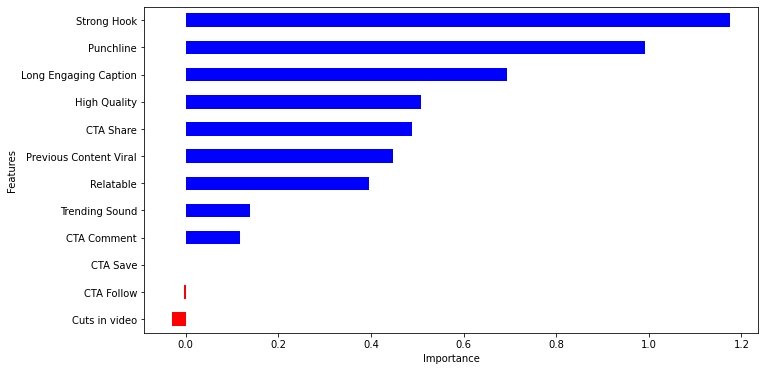

In [79]:
#Creation of the ranking of factors that lead to virality
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pan.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Results

My results indicated that the 3 most important factors for virality are (in this order):
-Strong Hook
-Punchline (payoff of watching the video)
-Relatability

This was actually makes quite a bit of sense. If a viewer feels an emotional response to a piece of content, the usual tendency is to share it. And usually users can tag people they'd like to share the video with in the comments of the videos, to which the people who were tagged will also comment. That drives up engagement, and overall watch time with all the people watching and also reading the comments. People will share it to their Instagram stories, which will help it garner more views and more exposure, creating a snowball effect.

The above is more of a theory/hypothesis. To refine this, I may go back and record the amount of comments and shares each of the 50 videos had, and look at the correlation between shares/comments and views. This could further validate my theory.

I did find my original hypothesis to be thoroughly disproved. While high quality as a factor did influence virality, it seems more cuts in a video tended to take away from it. I believe this may be due to inexperience in terms of video creation from the video creator, or possibly the oversaturation of videos with lots of cuts as of recent.

## Conclusion

In conclusion, the results indicate that a strong hook, a punchline/payoff, and relatability are the most important factors contributing to virality.